# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from my_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
!C:\Users\krist\anaconda3\Scripts\pip.exe install kdtree

In [3]:
!pip install citipy

You should consider upgrading via the 'c:\users\krist\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#pair lat and lng together
lat_lngs = list(zip(lats, lngs))
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
#     print(lat_lng)
       
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    
    # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

georgetown
bubaque
hobart
arraial do cabo
taolanaro
harrai
puerto escondido
hithadhoo
albany
mys shmidta
alekseyevsk
tumannyy
port hueneme
saint-philippe
mastic beach
tuatapere
castro
skalistyy
adrar
vaitupu
mar del plata
torbay
rio gallegos
rikitea
isangel
visnes
mansehra
husavik
new norfolk
vardo
bluff
coffs harbour
lorengau
barrow
areosa
nhulunbuy
georgetown
kapaa
victoria
atuona
toliary
albany
bluff
kodiak
kaitangata
busselton
cockburn town
ushuaia
ushuaia
mataura
castro
copiapo
ponta do sol
cidreira
manzanillo
chiche
te anau
aykhal
tasiilaq
east london
port lincoln
tungor
severo-kurilsk
vila velha
kahului
busselton
qaanaaq
samusu
grand river south east
illoqqortoormiut
tonj
saldanha
luderitz
port alfred
albany
kruisfontein
hermanus
garden city
valer
narsaq
port hardy
pangody
mount gambier
sayat
vardo
ushuaia
berlevag
khatanga
fort nelson
nishihara
kodinsk
tarakan
rawannawi
uirauna
kamenskoye
agropoli
mataura
shingu
lavrentiya
hobart
vaitupu
albany
san matias
bethel
rikitea
mangrol

jiddah
sinnamary
toktogul
luderitz
mahebourg
half moon bay
gilbues
khatanga
faanui
tasiilaq
busselton
ushuaia
hirara
milkovo
kruisfontein
rikitea
nalut
palauig
rikitea
uvalde
rikitea
hofn
oussouye
kholm-zhirkovskiy
punta arenas
bonthe
severo-kurilsk
iqaluit
yarmouth
cayenne
ushuaia
bedford
hithadhoo
naze
hithadhoo
kapaa
yuzhno-kurilsk
hearst
rikitea
lompoc
bimbo
romny
yulara
port keats
rikitea
belushya guba
ponta do sol
dikson
grootfontein
mataura
guerrero negro
ushuaia
omboue
punta arenas
camacha
lompoc
puerto ayora
aklavik
rikitea
rungata
nkhotakota
arraial do cabo
bengkulu
ossora
north bend
avarua
yellowknife
port alfred
punta arenas
brahmapuri
dikson
ucluelet
mae ramat
dabeiba
belmonte
castro
cape town
faya
longyearbyen
college
albany
qaanaaq
lebu
manoharpur
arlit
castro
alta floresta
avarua
punta arenas
belushya guba
andijon
ha giang
puerto ayora
smolenka
avarua
tiksi
barrow
belushya guba
new norfolk
ushuaia
college
ushuaia
thakurdwara
punta arenas
yellowknife
new norfolk
punta ar

0

In [5]:
   # List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#pair lat and lng together
lat_lngs = list(zip(lats, lngs))
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
#     print(lat_lng)
       
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     print(city)
    
    
    # If the city is unique, then add it to a our cities list
    # so there might be duplicate cities that are near to the lng and lat that are nearby, so we have to avoid putting the duplicate cities.
    # so we do "if city not in cities(cities is a list)", then add this specific "city" to the list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# {"coord":{"lon":-82.4584,"lat":27.9475},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":86.25,"feels_like":96.13,"temp_min":81.95,"temp_max":89.55,"pressure":1015,"humidity":71},"visibility":10000,"wind":{"speed":1.99,"deg":42,"gust":7},"clouds":{"all":90},"dt":1632084047,"sys":{"type":2,"id":2005199,"country":"US","sunrise":1632050222,"sunset":1632094208},"timezone":-14400,"id":4174757,"name":"Tampa","cod":200}

#***Save all the result inside this "city_data[]" list, so we use this "city_data[]" to run the rest of the code, instead of requesting from API each time, or you'll use up the free API very fast.
city_data=[]

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

for city in cities:
    print('processing {}'.format(city))
    
    city_url = url + '&q='+ city
#     print(city_url)
    city_weather = requests.get(city_url).json()
    city_data.append(city_weather)
    

print("done")
    
    


processing mimongo
processing amatitan
processing la ronge
processing odweyne
processing airai
processing springbok
processing yulara
processing xining
processing umzimvubu
processing kaitangata
processing punta arenas
processing portland
processing narsaq
processing illoqqortoormiut
processing valparaiso
processing barrow
processing taolanaro
processing singarayakonda
processing rikitea
processing gazli
processing belushya guba
processing hay river
processing sao raimundo das mangabeiras
processing hermanus
processing umm lajj
processing puerto ayora
processing zavitinsk
processing jamestown
processing belomorsk
processing cherskiy
processing nanortalik
processing cape town
processing tiksi
processing torbay
processing skaudvile
processing mount gambier
processing vaini
processing port alfred
processing vitimskiy
processing galesong
processing denpasar
processing albany
processing nemuro
processing tiznit
processing hilo
processing aleksandrov gay
processing sorland
processing shimoda

processing paamiut
processing codrington
processing huesca
processing comodoro rivadavia
processing barbar
processing husavik
processing vardo
processing sal rei
processing srivardhan
processing bowen
processing enshi
processing hobyo
processing tagusao
processing fare
processing saint-joseph
processing kayerkan
processing sola
processing lasa
processing sungaipenuh
processing ambulu
processing paragominas
processing sangmelima
processing bull savanna
processing tsiroanomandidy
processing villa carlos paz
processing louisbourg
processing sitka
processing moses lake
processing touros
processing marsh harbour
processing samusu
processing teruel
processing klaksvik
processing churapcha
processing college
processing mao
processing ribeira grande
processing fort saint john
processing amderma
processing sierra vista
processing coihaique
processing bargal
processing yendi
processing sri aman
processing pacific grove
processing canavieiras
processing miyako
processing broome
processing bateman

In [7]:
len(city_data)

645

In [8]:
city_data[0]

{'coord': {'lon': 11.6068, 'lat': -1.6195},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 67.03,
  'feels_like': 68.04,
  'temp_min': 67.03,
  'temp_max': 67.03,
  'pressure': 1014,
  'humidity': 98,
  'sea_level': 1014,
  'grnd_level': 952},
 'visibility': 10000,
 'wind': {'speed': 2.01, 'deg': 233, 'gust': 3.4},
 'clouds': {'all': 92},
 'dt': 1632286036,
 'sys': {'country': 'GA', 'sunrise': 1632286981, 'sunset': 1632330576},
 'timezone': 3600,
 'id': 2398430,
 'name': 'Mimongo',
 'cod': 200}

In [9]:
city_data[-1]

{'coord': {'lon': -72.0142, 'lat': 41.4398},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 66.58,
  'feels_like': 66.74,
  'temp_min': 61.27,
  'temp_max': 70.72,
  'pressure': 1025,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 110},
 'clouds': {'all': 90},
 'dt': 1632286261,
 'sys': {'type': 2,
  'id': 2037391,
  'country': 'US',
  'sunrise': 1632306943,
  'sunset': 1632350743},
 'timezone': -14400,
 'id': 4837648,
 'name': 'Ledyard Center',
 'cod': 200}

In [10]:
city_data[-1]['coord']['lon']

-72.0142

In [11]:
city_data[-1]['coord']['lat']

41.4398

In [12]:
city_data[-1]['cod']

200

In [13]:
for item in city_data:
#     if city['cod']
    
    print(item)
    print('')

{'coord': {'lon': 11.6068, 'lat': -1.6195}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.03, 'feels_like': 68.04, 'temp_min': 67.03, 'temp_max': 67.03, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 233, 'gust': 3.4}, 'clouds': {'all': 92}, 'dt': 1632286036, 'sys': {'country': 'GA', 'sunrise': 1632286981, 'sunset': 1632330576}, 'timezone': 3600, 'id': 2398430, 'name': 'Mimongo', 'cod': 200}

{'coord': {'lon': -103.7167, 'lat': 20.8333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.99, 'feels_like': 64.51, 'temp_min': 63.99, 'temp_max': 63.99, 'pressure': 1019, 'humidity': 94, 'sea_level': 1019, 'grnd_level': 880}, 'visibility': 10000, 'wind': {'speed': 4.14, 'deg': 67, 'gust': 4.16}, 'clouds': {'all': 85}, 'dt': 1632286037, 'sys': {'cou

In [14]:
kc=['a', 'b', 'c']

for alpha in kc:
    print(alpha)

a
b
c


In [15]:
for item in city_data:
    if item['cod']==200:
        
        print(item['coord']['lon'])


11.6068
-103.7167
-105.2842
45.064
125.4092
17.8865
130.9889
101.7667
169.8464
-70.9167
-122.6762
-46.05
-71.6273
-156.7887
80.0333
-134.9692
63.45
-115.7999
-45.4811
19.2345
37.2685
-90.3518
129.45
-79.2353
34.7668
161.3
-45.2371
18.4232
128.8694
-52.7314
22.6167
140.7667
-175.2
26.891
119.3661
115.2167
-73.9662
145.575
-9.5
-155.09
48.5704
12.6934
138.95
-159.775
80.5464
114.0833
24.7314
-159.319
-73.8203
-56.1549
68.5944
-57.5575
147.3294
118.3319
-41.3
57.7
-97.8558
15.1594
55.5154
56.2719
168.8643
6.1333
168.3333
-65.1023
30.7861
91.6419
114.1577
-68.3
32.6942
71.1618
142.8448
167.6833
-75.4493
127.6694
-81.9481
3.4459
31.65
-139.0333
115.3333
-59.4307
-25.4333
-35.1478
46.0833
177.4833
57.6142
108.9667
172.7902
3.9054
113.6333
-152.4072
102.5
40.6728
140.8333
88.3972
80.6
-70.7324
20.9156
107.4433
116.8463
-87.9033
-1.3187
70.8342
106.2708
44.3779
-65.7125
-51.1
90.2201
173.1667
121.0167
-39.2481
44.75
-89.1
-24.4956
147.0587
-16.3333
15.6401
-76.2167
5.9167
18.296
-77.366
-122.4

In [16]:
for item in city_data:
    if item['cod']!=200:
        
        print(item)

{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city 

In [17]:
list_master=[]

for item in city_data:
    if item['cod'] == 200:
        
        #if the particular city's 'cod'= 200, retrieve the following information from this city.
        latitude = item['coord']['lat']
        longtitude = item['coord']['lon']
        max_temperature = item['main']['temp_max']
        humidity = item['main']['humidity']
        clouds = item['clouds']['all']
        wind_speed = item['wind']['speed']
        country = item['sys']['country']
        weather_date = item['dt']
        city_name = item['name']
        
        # create a dictionary of one city
        dict_city = {'City': city_name, 'Latitude': latitude, 'Longtitude': longtitude, 'Max Temperature': max_temperature, 'Humidity': humidity,
                     'Clouds': clouds, 'Wind Speed': wind_speed, 'Country': country, 'Weather Date': weather_date}
        
        # adding this dictionary to the master list
        list_master.append(dict_city)
           
        
#         print(item['coord']['lon'])

In [18]:
# city_data[0]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# df = pd.DataFrame(data = results)

In [20]:
df = pd.DataFrame(list_master)
df.head()

,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date
0,Mimongo,-1.6195,11.6068,67.03,98,92,2.01,GA,1632286036
1,Amatitán,20.8333,-103.7167,63.99,94,85,4.14,MX,1632286037
2,La Ronge,55.1001,-105.2842,55.65,62,75,5.75,CA,1632286037
3,Oodweyne,9.4092,45.0640,78.15,44,18,20.56,SO,1632286037
4,Airai,-8.9266,125.4092,69.13,52,90,6.91,TL,1632286038


In [21]:
df = pd.DataFrame(list_master)
df.head()

df.to_csv('complete_weather_info.csv', index=False)


In [22]:
new_df = pd.read_csv('complete_weather_info.csv')
new_df.head()

,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date
0,Mimongo,-1.6195,11.6068,67.03,98,92,2.01,GA,1632286036
1,Amatitán,20.8333,-103.7167,63.99,94,85,4.14,MX,1632286037
2,La Ronge,55.1001,-105.2842,55.65,62,75,5.75,CA,1632286037
3,Oodweyne,9.4092,45.0640,78.15,44,18,20.56,SO,1632286037
4,Airai,-8.9266,125.4092,69.13,52,90,6.91,TL,1632286038


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             592 non-null    object 
 1   Latitude         592 non-null    float64
 2   Longtitude       592 non-null    float64
 3   Max Temperature  592 non-null    float64
 4   Humidity         592 non-null    int64  
 5   Clouds           592 non-null    int64  
 6   Wind Speed       592 non-null    float64
 7   Country          587 non-null    object 
 8   Weather Date     592 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 41.8+ KB


In [24]:
query = new_df['Humidity'] > 100
dfhumiditygt100 = new_df[query]
dfhumiditygt100.head()

#alternative
# dfhumiditygt100 = new_df[new_df['Humidity'] > 100]

,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
query = new_df['Humidity'] > 100
dfhumiditygt100 = new_df[query]
dfhumiditygt100.head()

#alternative
# dfhumiditygt100 = new_df[new_df['Humidity'] > 100]

,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date


In [26]:
#  Get the indices of cities that have humidity over 100%.
# Answer: No cities that have humidity over 100%.

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame,which we call "clean_city_data".


# tryquery = new_df['Humidity'] > 60
# index60 = new_df[tryquery].index

# dfless60 = new_df.drop(index60)
# dfless60.head()


query = new_df['Humidity'] > 100
index100 = new_df[query].index

df_clean_weather = new_df.drop(index100)
df_clean_weather.head()



,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date
0,Mimongo,-1.6195,11.6068,67.03,98,92,2.01,GA,1632286036
1,Amatitán,20.8333,-103.7167,63.99,94,85,4.14,MX,1632286037
2,La Ronge,55.1001,-105.2842,55.65,62,75,5.75,CA,1632286037
3,Oodweyne,9.4092,45.0640,78.15,44,18,20.56,SO,1632286037
4,Airai,-8.9266,125.4092,69.13,52,90,6.91,TL,1632286038


In [28]:
# Extract relevant fields from the data frame

latitude = df_clean_weather['Latitude']
max_temperature = df_clean_weather['Max Temperature']
humidity = df_clean_weather['Humidity']
clouds = df_clean_weather['Clouds']
wind_speed = df_clean_weather['Wind Speed']

# Export the City_Data into a csv
df_clean_weather.to_csv('clean_weather_info.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [29]:
latitude

0      -1.6195
1      20.8333
2      55.1001
3       9.4092
4      -8.9266
        ...   
587    17.4833
588    28.4682
589    41.7597
590   -23.6500
591    41.4398
Name: Latitude, Length: 592, dtype: float64

In [30]:
type(max_temperature)

#One column data is a series,and multiple columns is a DataFrame.

pandas.core.series.Series

In [31]:
type(df_clean_weather)

pandas.core.frame.DataFrame

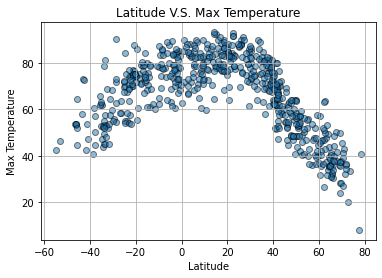

In [35]:
plt.scatter(latitude, max_temperature, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.grid(True)

plt.savefig("images/Latitude_vs_MaxTemperature.png")
# plt.savefig("Latitude_vs_MaxTemperature.png")
plt.show()


## Latitude vs. Humidity Plot

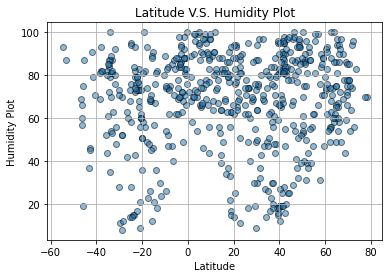

In [37]:
plt.scatter(latitude, humidity, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity Plot')

plt.grid(True)

plt.savefig("images/Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

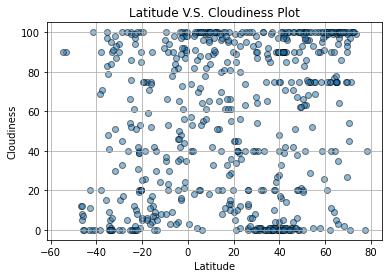

In [38]:
plt.scatter(latitude, clouds, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.grid(True)

plt.savefig("images/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

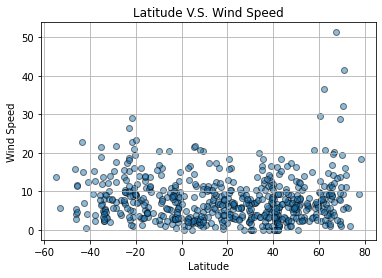

In [39]:
plt.scatter(latitude, wind_speed, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.grid(True)

plt.savefig("images/Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots

In [34]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression